In [1]:
import os, sys, re
import subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import matplotlib.pyplot as plt

In [2]:
year = "2018"
name = "templates"
picklename = year+'/'+name+'.pkl'

In [3]:
ggf = pickle.load(open(picklename,'rb')).integrate('region','signal-ggf').integrate('mjj',overflow='allnan').sum('genflavor').integrate('systematic','nominal')

In [4]:
mcprocs = ['Zjets','Wjets']

hdata = ggf.integrate('process','data')
hmc = ggf.integrate('process',mcprocs)
hmc.scale(-1)

h = hdata #+ hmc

In [5]:
ptbins = [450, 500, 550, 600, 675, 800, 1200]

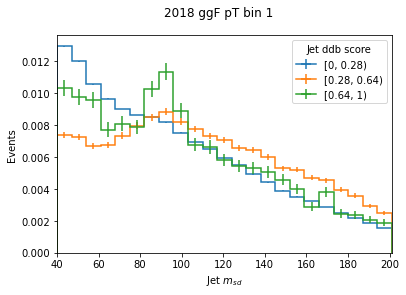

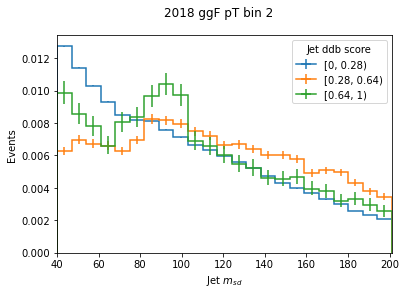

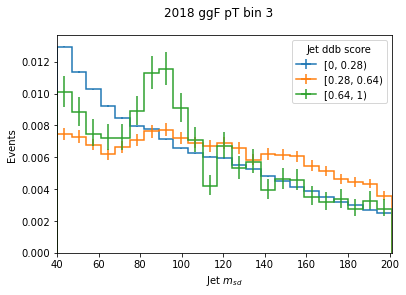

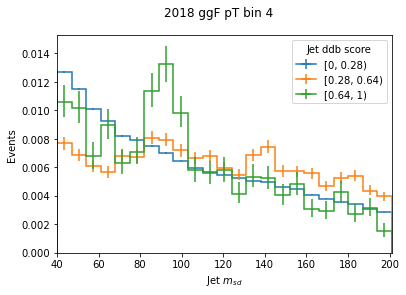

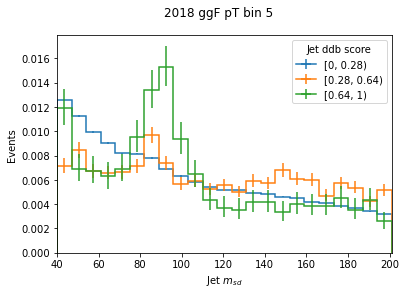

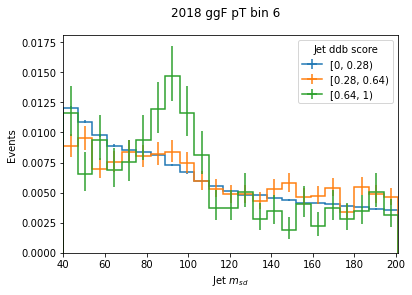

In [6]:
for i in range(0,len(ptbins)-1):
    ggf_i = h.integrate('pt1',int_range=slice(ptbins[i],ptbins[i+1]))
    hist.plot1d(ggf_i,overlay='ddb1',density=True)
    plt.suptitle(year+' ggF pT bin '+str(i+1))
    plt.savefig('jans-test/figures/'+year+'_ggF'+str(i+1)+'.png')
    plt.show()

In [7]:
vbf = pickle.load(open(picklename,'rb')).integrate('region','signal-vbf').sum('pt1','genflavor').integrate('systematic','nominal')

In [8]:
mcprocs = ['Zjets','Wjets']

hdata = vbf.integrate('process','data')
hmc = vbf.integrate('process',mcprocs)
hmc.scale(-1)

h = hdata #+ hmc

In [9]:
mjjbins = [1000,2000,13000]

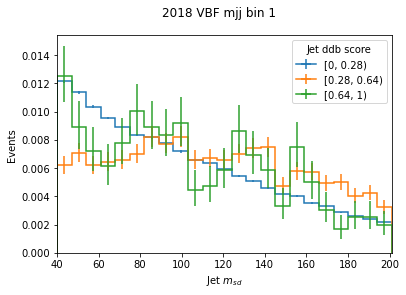

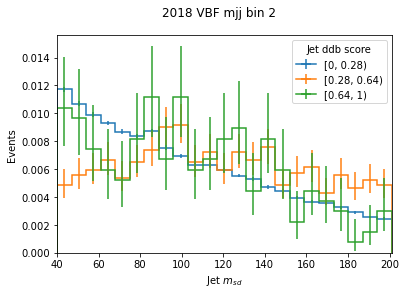

In [10]:
for i in range(0,len(mjjbins)-1):
    vbf_i = h.integrate('mjj',int_range=slice(mjjbins[i],mjjbins[i+1]))
    hist.plot1d(vbf_i,overlay='ddb1',density=True)
    plt.suptitle(year+' VBF mjj bin '+str(i+1))
    plt.savefig('jans-test/figures/'+year+'_VBF'+str(i+1)+'.png')
    plt.show()